# MSc. Dissertation - DataScience By Robert Solomon
### Analysis of Remote Work Impact on Employee Well-Being (Cleaned Primary Dataset)

In [1]:
# Importing necessary libraries here below:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 1. Loading in the primary survey data

In [3]:
# Loading cleaned dataset
wfh_cleanedMentalHealth_surveyData = pd.read_csv('../Primary_Research/PR_Dataset/cleaned_WFH-Mental_Health_(Survey).csv')

In [4]:
# Displaying the first few rows to inspect the data
wfh_cleanedMentalHealth_surveyData.head()

,Timestamp,Age_Group,Gender,Work_Location,Industry,Work_Life_Balance,Weekly_Hours_Worked,Stress_Level,Stress_Factors,Social_Isolation_Frequency,Lack_Of_Team_Connection,Employer_Mental_Health_Support,Mental_Health_Recommendations,stress_score
0,2025/01/27 12:02:17 PM GMT,25–34,0,NaN,IT/Technology,4,35,4,Isolation from colleagues,1.0,1.0,2,Stop remote work and have people come into the...,3.0
1,2025/01/27 12:02:39 PM GMT,25–34,0,1.0,IT/Technology,5,40,5,Lack of clarity about whether I will be forced...,2.0,0.0,1,No Response,3.0
2,2025/01/27 12:11:36 PM GMT,35–44,0,1.0,IT/Technology,5,39,5,Other (please specify);Less commute / Less tim...,3.0,0.0,3,Regional hot desk options at some of the many ...,2.0
3,2025/01/27 12:14:54 PM GMT,45–54,0,1.0,IT/Technology,5,39,5,On call over weekends,3.0,0.0,3,Occasional lunchtime meetups if enough people ...,2.0
4,2025/01/27 12:25:24 PM GMT,35–44,1,1.0,IT/Technology,2,9,2,Increased workload,4.0,0.0,3,Add remote workers team lead to identify possi...,-2.0


In [5]:
#Selecting only numeric columns (int)
numeric_only_df = wfh_cleanedMentalHealth_surveyData.select_dtypes(include=['number'])

In [6]:
# Computing correlation matrix
correlation_matrix = numeric_only_df.corr()

In [7]:
# Correlation Analysis
# correlation_matrix = wfh_cleanedMentalHealth_surveyData['Work_Life_Balance', 'Work_Hours_Worked', 'Stress_Level'].corr()
# print("Correlation Matrix:\n")
# print(correlation_matrix.round(2).to_string())

In [22]:
# Displaying the result
print(correlation_matrix)

                                  Gender  Work_Location  Work_Life_Balance  \
Gender                          1.000000       0.139237          -0.306130   
Work_Location                   0.139237       1.000000          -0.077664   
Work_Life_Balance              -0.306130      -0.077664           1.000000   
Stress_Level                   -0.306130      -0.077664           1.000000   
Social_Isolation_Frequency     -0.055038      -0.160448          -0.545842   
Lack_Of_Team_Connection        -0.031250      -0.017927          -0.333877   
Employer_Mental_Health_Support -0.318191      -0.046475          -0.075045   
stress_score                   -0.095505       0.048351           0.881567   

                                Stress_Level  Social_Isolation_Frequency  \
Gender                             -0.306130                   -0.055038   
Work_Location                      -0.077664                   -0.160448   
Work_Life_Balance                   1.000000                   -0.545

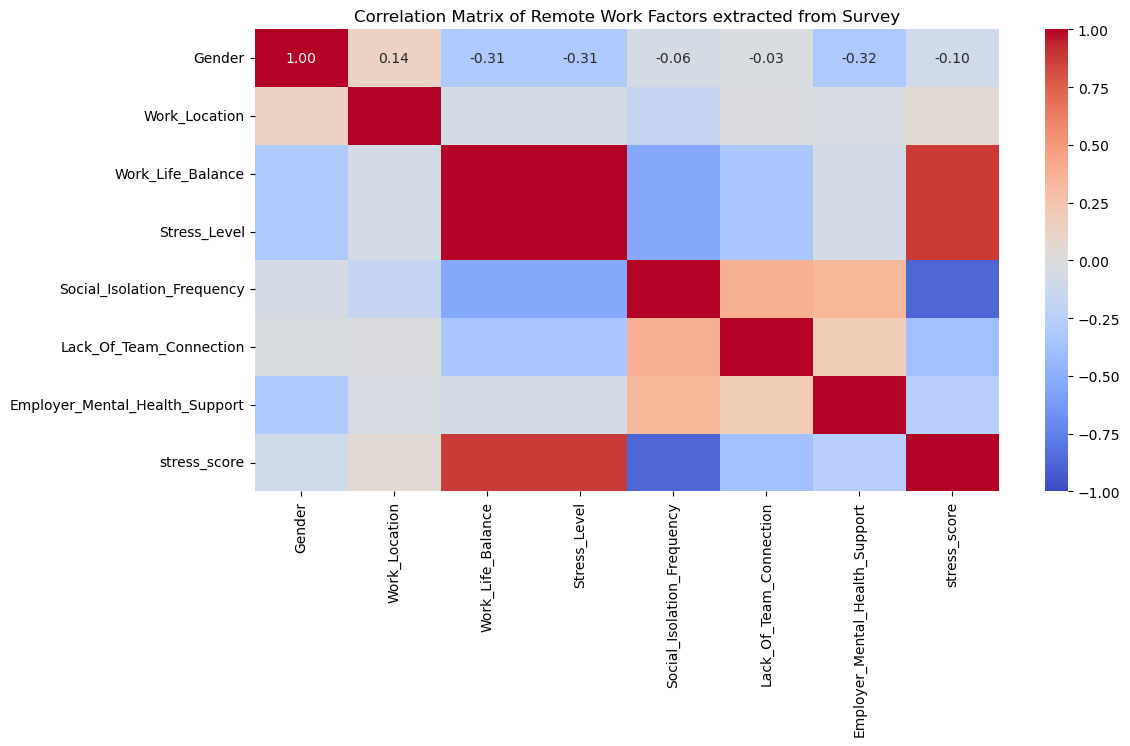

In [26]:
# Saving correlation matrix to file
correlation_matrix.to_csv("../Primary_Research/results/correlation_matrix.csv")

# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix of Remote Work Factors extracted from Survey")
plt.savefig("../IMG/correlation_matrix.png")
plt.show()

In [11]:
# Regression Modeling
regression_model = ols('Stress_Level ~ Work_Life_Balance + Weekly_Hours_Worked + C(Age_Group) + C(Gender) + C(Work_Location) + C(Industry)', data=wfh_cleanedMentalHealth_surveyData).fit()
print("\nRegression Model Summary for Mental Health Survey:\n")
print(regression_model.summary())


Regression Model Summary for Mental Health Survey:

                            OLS Regression Results                            
Dep. Variable:           Stress_Level   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.289e+29
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          5.83e-216
Time:                        23:16:52   Log-Likelihood:                 1396.6
No. Observations:                  43   AIC:                            -2737.
Df Residuals:                      15   BIC:                            -2688.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [12]:
# Additional Analysis for Primary Data
print("\nFrequency of Stress Factors:\n")
print(wfh_cleanedMentalHealth_surveyData['Stress_Factors'].value_counts().head().to_string())

print("\nFrequency of Social Isolation:\n")
print(wfh_cleanedMentalHealth_surveyData['Social_Isolation_Frequency'].value_counts().to_string())

print("\nFrequency of Lack of Connection with Team:\n")
print(wfh_cleanedMentalHealth_surveyData['Lack_Of_Team_Connection'].value_counts().to_string())

print("\nFrequency of Employer Providing Mental Health Resources:\n")
print(wfh_cleanedMentalHealth_surveyData['Employer_Mental_Health_Support'].value_counts().to_string())


Frequency of Stress Factors:

Stress_Factors
Increased workload                                                       7
Isolation from colleagues                                                3
Increased workload;Lack of proper resources                              3
Isolation from colleagues;Lack of proper resources                       3
Increased workload;Isolation from colleagues;Difficulty managing time    2

Frequency of Social Isolation:

Social_Isolation_Frequency
4.0    12
2.0    11
3.0    10
1.0     1

Frequency of Lack of Connection with Team:

Lack_Of_Team_Connection
0.0    32
1.0    12

Frequency of Employer Providing Mental Health Resources:

Employer_Mental_Health_Support
1    22
3    14
2     9
